In [2]:
import bt

In [3]:
%matplotlib inline

In [4]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
print(data.head())

                  spy        agg
Date                            
2010-01-04  89.225410  74.942825
2010-01-05  89.461586  75.283791
2010-01-06  89.524574  75.240227
2010-01-07  89.902473  75.153221
2010-01-08  90.201691  75.196724


In [5]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [6]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

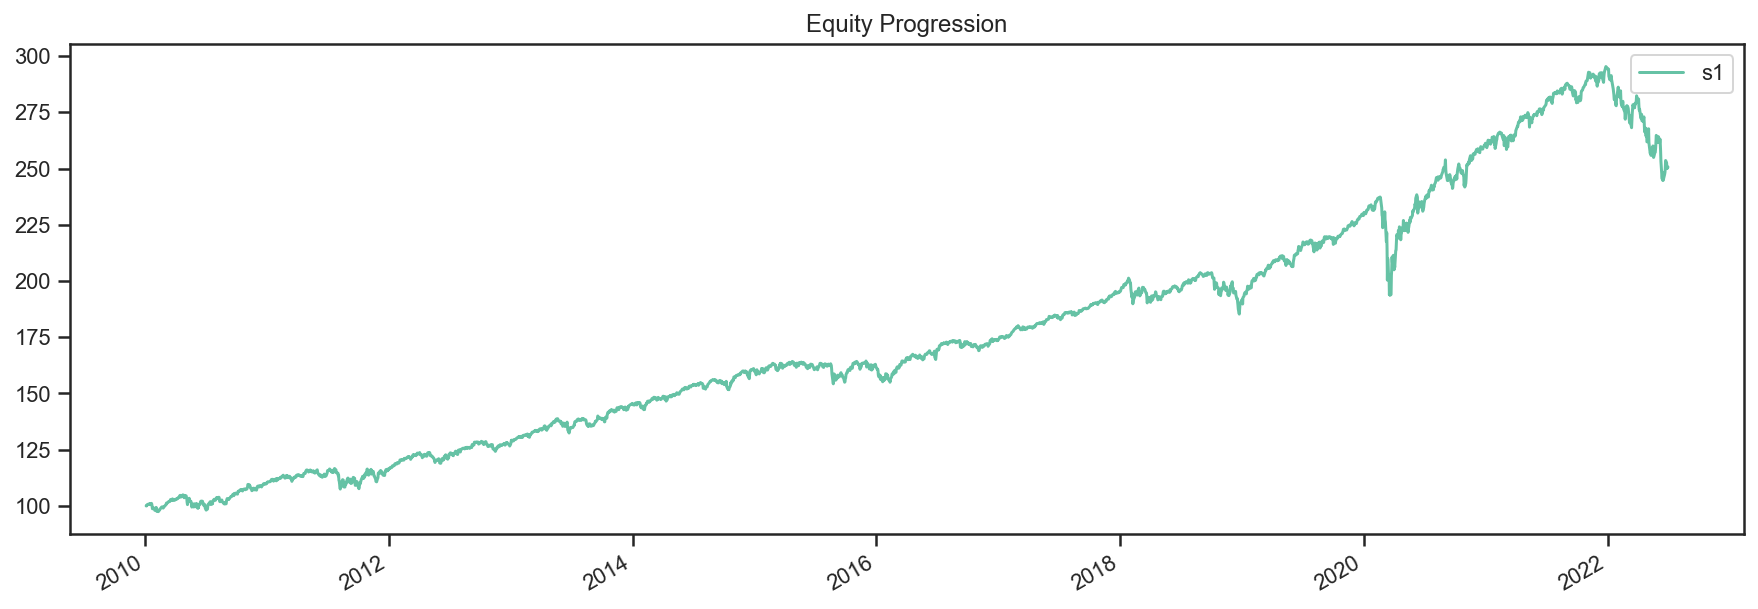

In [7]:
# first let's see an equity curve
res.plot();

In [8]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2022-07-01
Risk-free rate       0.00%

Total Return         150.73%
Daily Sharpe         0.90
Daily Sortino        1.35
CAGR                 7.64%
Max Drawdown         -18.42%
Calmar Ratio         0.41

MTD                  0.18%
3m                   -10.33%
6m                   -14.84%
YTD                  -14.84%
1Y                   -10.15%
3Y (ann.)            5.12%
5Y (ann.)            6.44%
10Y (ann.)           7.36%
Since Incep. (ann.)  7.64%

Daily Sharpe         0.90
Daily Sortino        1.35
Daily Mean (ann.)    7.74%
Daily Vol (ann.)     8.62%
Daily Skew           -0.98
Daily Kurt           16.56
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       1.06
Monthly Sortino      1.91
Monthly Mean (ann.)  7.81%
Monthly Vol (ann.)   7.36%
Monthly Skew         -0.39
Monthly Kurt         1.59
Best Month           7.57%
Worst Month          -6.44%

Yearl

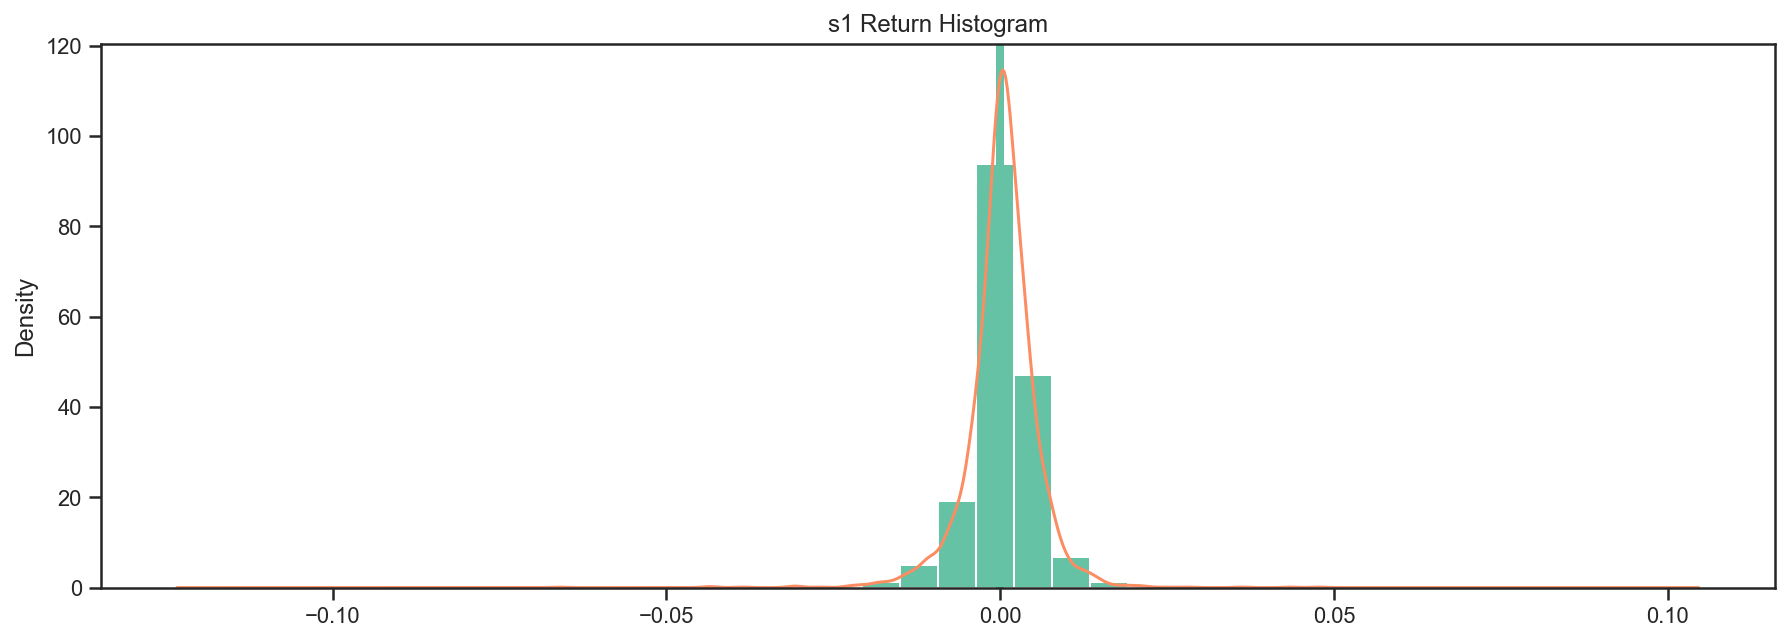

In [9]:
# ok and how does the return distribution look like?
res.plot_histogram()

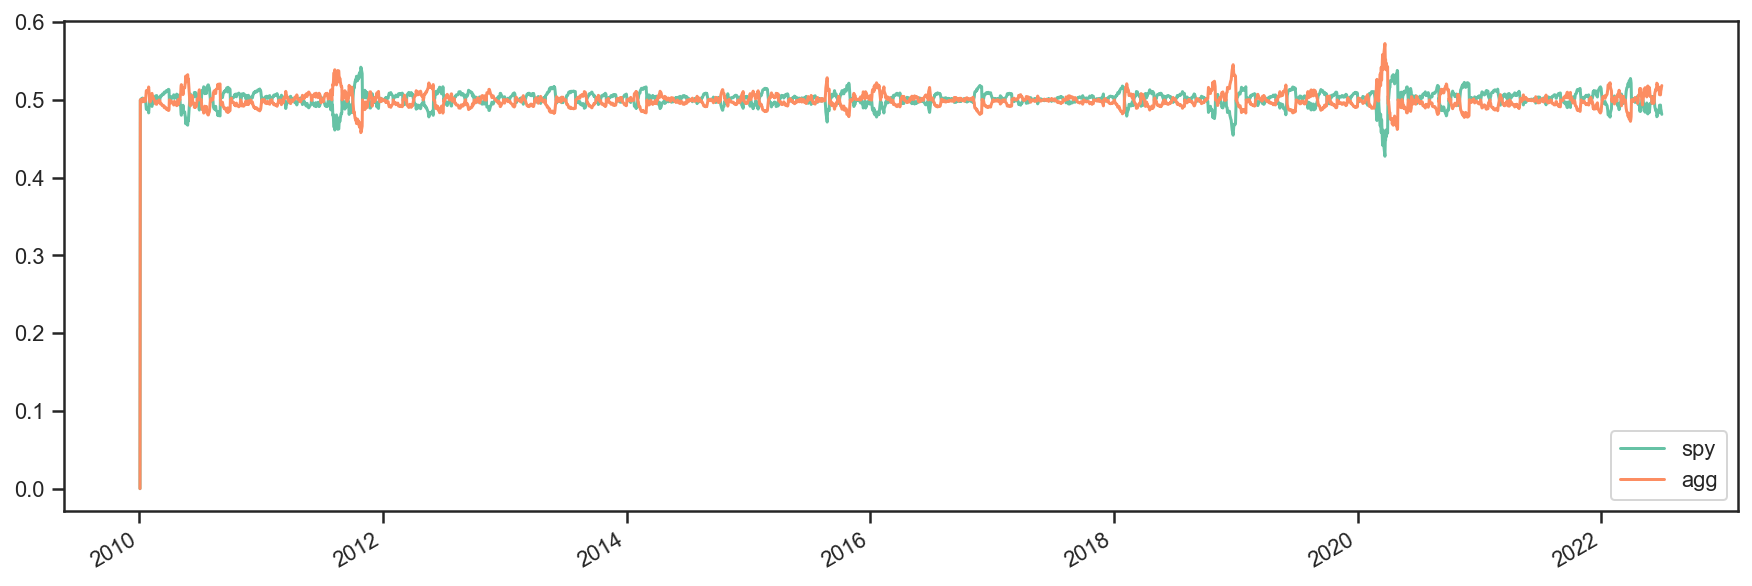

In [10]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

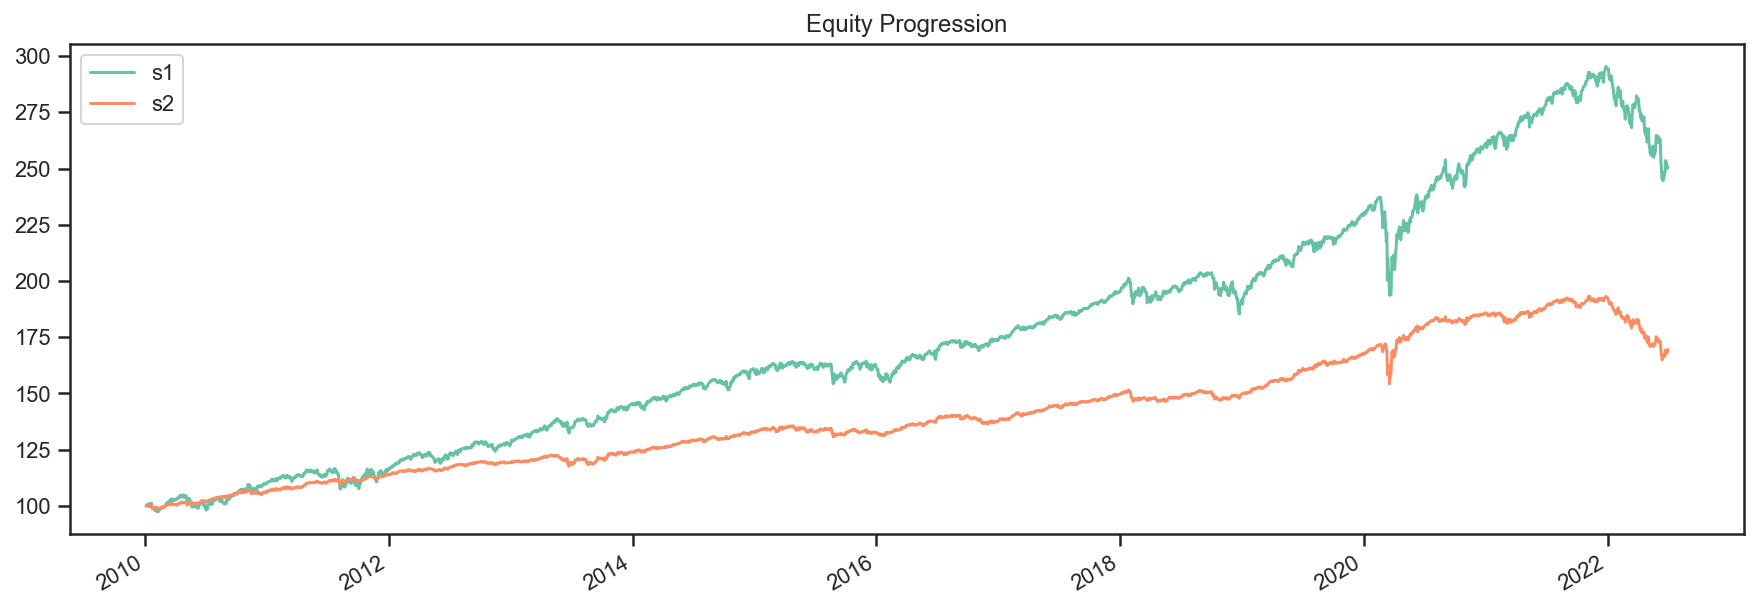

In [11]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

In [12]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2022-07-01  2022-07-01
Risk-free rate       0.00%       0.00%

Total Return         150.73%     69.58%
Daily Sharpe         0.90        0.96
Daily Sortino        1.35        1.41
CAGR                 7.64%       4.32%
Max Drawdown         -18.42%     -14.62%
Calmar Ratio         0.41        0.30

MTD                  0.18%       0.38%
3m                   -10.33%     -6.88%
6m                   -14.84%     -12.00%
YTD                  -14.84%     -12.00%
1Y                   -10.15%     -10.03%
3Y (ann.)            5.12%       1.84%
5Y (ann.)            6.44%       3.35%
10Y (ann.)           7.36%       3.76%
Since Incep. (ann.)  7.64%       4.32%

Daily Sharpe         0.90        0.96
Daily Sortino        1.35        1.41
Daily Mean (ann.)    7.74%       4.33%
Daily Vol (ann.)     8.62%       4.50%
Daily Skew           -0.98       -2.21
Daily